In [75]:
import numpy as np
import matplotlib.pyplot as plt


In [77]:
class Hopfield:

  def __init__ (self, X, sync=False):
    self.X=X
    self.sync=sync
    self.W=self.X.dot(self.X.T)-self.X.shape[1]*np.eye(self.X.shape[0])

  def Predict(self,X):
    a =[] 
    a.append(self.W.dot(X))
    for i in range(1,1000):
      a.append(np.sign(np.dot(self.W,a[i-1]))) 
      if(np.array_equal(a[i],a[i-1])):
        #print(a[i])
        return a[i]
          
        break
      else:
        pass
      while(self.sync==False):
        for j in range(self.X.shape[0]):
          if(a[i][j]!=a[i-1][j]):
            for v in range(j+1,self.X.shape[0]):
              a[i][v]=a[i-1][v]    
        break 


Example

In [64]:
X = np.array([[1,1,1,1],[1,-1,-1,1]]).T  
x = np.array([[1,-1,1,1]]).T                
#definig an object
b=Hopfield(X)
print(b.Predict(x))
print(b.W)

[[ 1.]
 [-1.]
 [-1.]
 [ 1.]]
[[0. 0. 0. 2.]
 [0. 0. 2. 0.]
 [0. 2. 0. 0.]
 [2. 0. 0. 0.]]


In [5]:
from PIL import Image
import random

In [6]:
def hopimage (X):
  img = Image.open(X).resize((100,100)).convert('L')
  img_arr = np.array(img)
  print(img_arr.size)
  print(img_arr.shape)
  plt.figure()
  plt.imshow(img_arr,cmap='gray')
  plt.show()
  one_dim = np.reshape(img_arr,(100*100))[:,np.newaxis]
  size=one_dim.shape[0]
  dimarray=np.array(one_dim)
  for i in range(size):
    if dimarray[i] >127 :
      one_dim[i]= 1
    else:
      one_dim[i]=-1
  return one_dim

In [12]:
def NoisyImage (X,noise) :
  hi = hopimage(X)
  hiarray=np.array(hi)
  for i in range(int(10000*noise/100)):
    rnd=np.random.randint(0,9999,dtype=int)
    if hiarray[rnd] == 1 :
      hi[rnd] = -1
    else:
      hi[rnd] = 1
  return hi

10000
(100, 100)


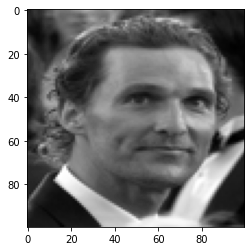

10000
(100, 100)


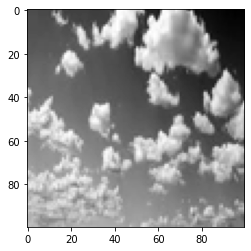

In [14]:
img1 = hopimage('matthew.jpg')
img2 = hopimage('download.jpg')

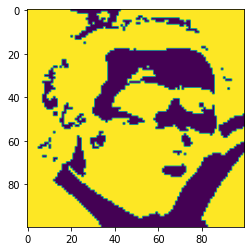

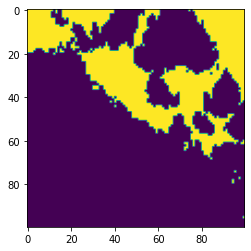

(10000, 1) (10000, 1)


In [67]:
pic1 = np.reshape(img1,(100,100))
plt.figure()
plt.imshow(pic1)
plt.show()

pic2 = np.reshape(img2,(100,100))
plt.figure()
plt.imshow(pic2)
plt.show()

print(img1.shape,img2.shape)

In [68]:
X = np.concatenate((img1,img2),axis=1)
print(X.shape)

(10000, 2)


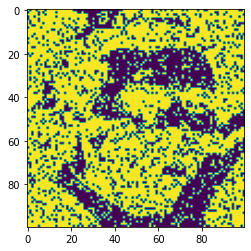

In [69]:
hopf = Hopfield(X)
noisy = NoisyImage('matthew.jpg',20)
pic = np.reshape(noisy,(100,100))
plt.figure()
plt.imshow(pic)
plt.show()

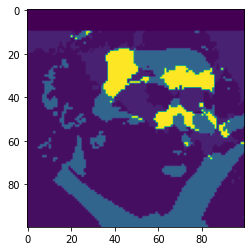

In [79]:
a=hopf.Predict(noisy)
pic = np.reshape(a,(100,100))
#print(hopf.Predict(noisy).shape)
plt.figure()
plt.imshow(pic)
plt.show()